### Project Overview
This project analyzes 20,000+ Shopee Malaysia product listings to identify sales patterns, 
customer behavior, and business insights.  
The analysis is done using **Python (pandas, seaborn, matplotlib)**, 
and the dataset is prepared for **Tableau / Power BI dashboards**.

# Shopee E-commerce Sales Analysis

## 1. Import Libraries & Load Dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [17]:
data_path = "C:\\Project\\shopee-analysis\\20240121_shopee_sample_data.csv"
df = pd.read_csv(data_path)
df.head()

,price_ori,Main category,Subcategory 1,Subcategory 2,w_date,item_rating,seller_name,price_actual,total_rating,total_sold,favorite,specification
0,26,Women's Bags,Shoulder Bags,Shoulder Bags,27/4/2023,4.9,qqfwholesale,13,179,179,128,Product Specifications Category Shopee Women's...
1,9,Women's Bags,Handbags,Set Handbags,26/4/2023,4.9,fooyin88,9,8100,8100,22,Product Specifications Category Shopee Home Ap...
2,3999,Cameras & Drones,DSLR Cameras,DSLRs,26/4/2023,5.0,xpro.gadget,2739,10,10,132,Product Specifications Category Shopee Women's...
3,19,Others,Fengshui & Religious Supplies,Fengshui & Religious Supplies,26/4/2023,5.0,hokarhock,19,17,17,11,Product Specifications Category Shopee Women C...
4,11,Men Clothes,Traditional Wear,Bottoms,24/4/2023,5.0,mrbunny.my,6,17,17,34,Product Specifications Category Shopee Cameras...


We start by importing the dataset and essential Python libraries.
Display first 5 rows and columns data details.


## 2. Data Cleaning

In [18]:
# Remove duplicate rows
df = df.drop_duplicates()

# Convert date column to datetime format
df["w_date"] = pd.to_datetime(df["w_date"], dayfirst=True, errors="coerce")

# Drop rows with invalid or missing dates
df = df.dropna(subset=["w_date"])

# Remove rows with zero or negative prices
df = df[(df["price_actual"] > 0) & (df["price_ori"] > 0)]

# Fill missing values in categorical columns
df["Main category"] = df["Main category"].fillna("Unknown")
df["Subcategory 1"] = df["Subcategory 1"].fillna("Unknown")
df["Subcategory 2"] = df["Subcategory 2"].fillna("Unknown")
df["seller_name"] = df["seller_name"].fillna("Unknown")


# Check results
print("Shape after cleaning:", df.shape)
print("Missing values per column:")
print(df.isnull().sum())

Shape after cleaning: (5891, 12)
Missing values per column:
price_ori        0
Main category    0
Subcategory 1    0
Subcategory 2    0
w_date           0
item_rating      0
seller_name      0
price_actual     0
total_rating     0
total_sold       0
favorite         0
specification    0
dtype: int64



- Removed duplicate rows to ensure each record is unique.
- Converted w_date column from string to proper datetime format.
- Dropped rows with invalid or missing dates after conversion.
- Removed rows with zero or negative prices (price_actual or price_ori).
- Filled missing values in categorical columns (Main category, Subcategory 1, Subcategory 2, seller_name) with "Unknown".
- After cleaning, the dataset contains 5,891 rows and 12 columns.
- No missing values remain in any column, including specification. 

## 3. Exploratory Data Analysis

### (A) Top 10 Products by Sales

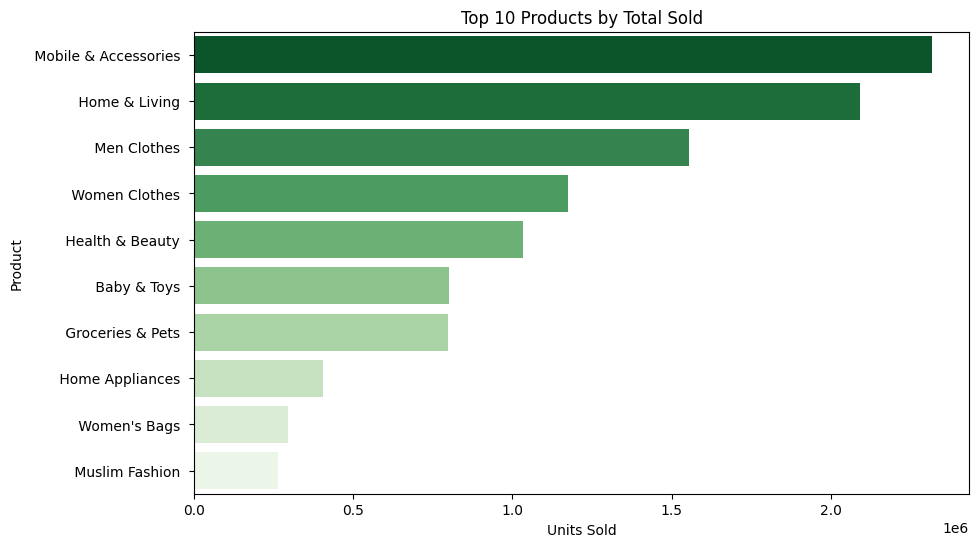

In [19]:
top_products = df.groupby("Main category")["total_sold"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="Greens_r", legend=False)
plt.title("Top 10 Products by Total Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product")
plt.show()

We identify the products with the highest total units sold.

### (B) Rating vs Sales

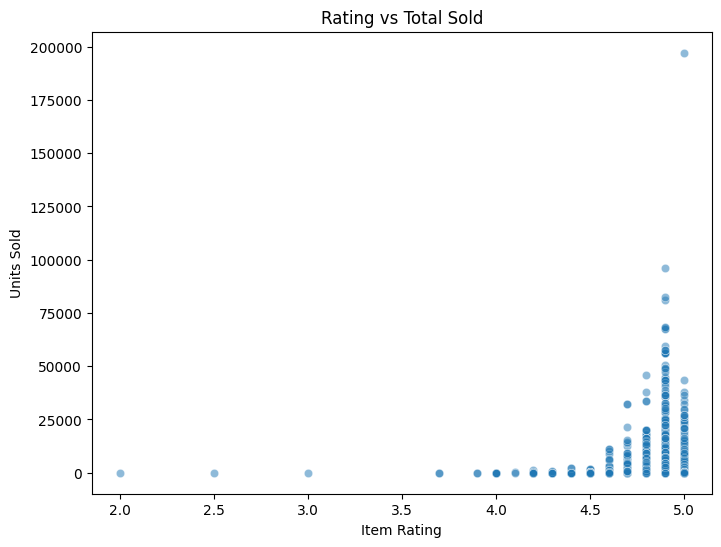

In [20]:
plt.figure(figsize=(8,6))
item_rating_numeric = pd.to_numeric(df["item_rating"], errors="coerce")
sns.scatterplot(x=item_rating_numeric, y=df["total_sold"], alpha=0.5)
plt.title("Rating vs Total Sold")
plt.xlabel("Item Rating")
plt.ylabel("Units Sold")
plt.show()

### (C) Regional Sales

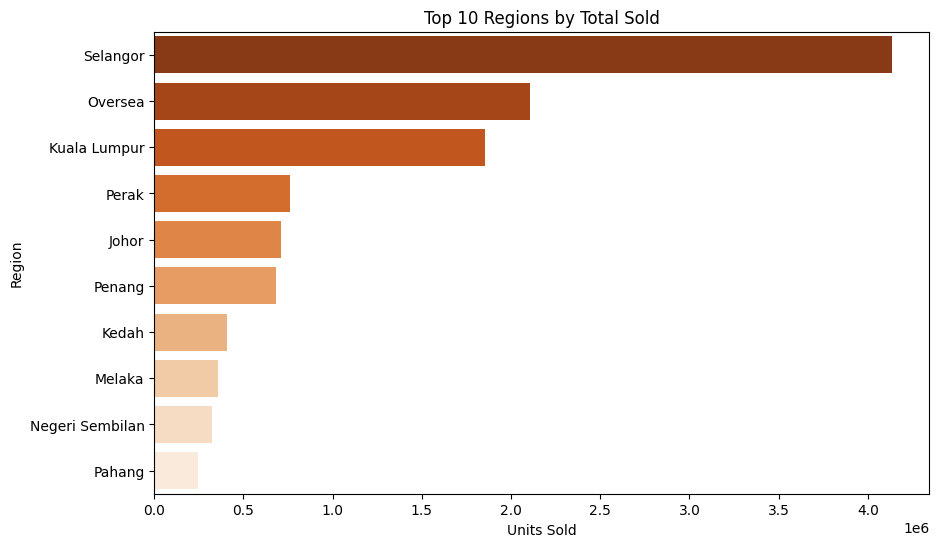

Top 10 Regions by Sales:
 region
Selangor           4137526
Oversea            2105690
Kuala Lumpur       1851297
Perak               760159
Johor               708720
Penang              682215
Kedah               405515
Melaka              356675
Negeri Sembilan     321632
Pahang              242394
Name: total_sold, dtype: int64


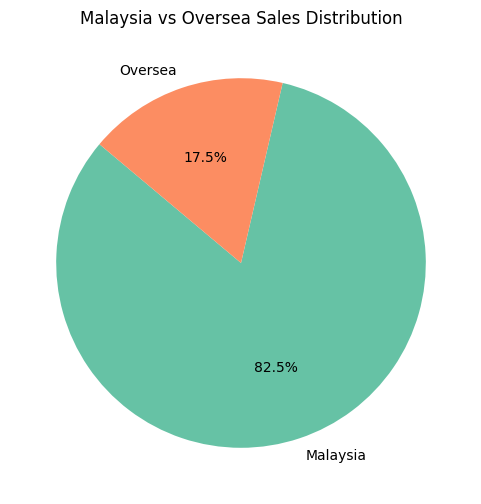

Malaysia vs Oversea Sales:
 region_type
Malaysia    9921501
Oversea     2105690
Name: total_sold, dtype: int64


In [21]:
  
# Define Malaysia states
malaysia_states = [
    "Johor", "Kedah", "Kelantan", "Melaka", "Negeri Sembilan",
    "Pahang", "Penang", "Perak", "Perlis", "Sabah", "Sarawak",
    "Selangor", "Terengganu", "Kuala Lumpur", "Labuan", "Putrajaya"
]

# Extract region from 'specification' field
def extract_region(spec):
    if pd.isna(spec):
        return "Unknown"
    for state in malaysia_states:
        if state.lower() in str(spec).lower():
            return state
    return "Oversea"

df["region"] = df["specification"].apply(extract_region)

# ---- Top 10 Regions by Sales ----
region_sales = df.groupby("region")["total_sold"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=region_sales.values, y=region_sales.index, hue=region_sales.index, palette="Oranges_r", legend=False)
plt.title("Top 10 Regions by Total Sold")
plt.xlabel("Units Sold")
plt.ylabel("Region")
plt.show()

print("Top 10 Regions by Sales:\n", region_sales)

# ---- Malaysia vs Oversea Sales ----
df["region_type"] = df["region"].apply(lambda x: "Malaysia" if x in malaysia_states else "Oversea")

region_type_sales = df.groupby("region_type")["total_sold"].sum()

plt.figure(figsize=(6,6))
plt.pie(region_type_sales.values, labels=region_type_sales.index, autopct="%.1f%%", startangle=140, colors=["#66c2a5","#fc8d62"])
plt.title("Malaysia vs Oversea Sales Distribution")
plt.show()

print("Malaysia vs Oversea Sales:\n", region_type_sales)

Based on our analysis, the sales volume is heavily concentrated within the Malaysian domestic market.
| Category   | Total Units Sold |
|------------|-----------------|
| **Malaysia** | **9,921,501** |
| **Oversea**  | **2,105,690** |

The data reveals that domestic sales in Malaysia account for the vast majority of units sold, significantly outperforming cross-border e-commerce.

### Top-Performing Malaysian Regions
A closer examination of regional performance identifies which areas are driving domestic sales.

| Region           | Total Units Sold |
|------------------|-----------------|
| **Selangor**       | **4,137,526** |
| **Kuala Lumpur**   | **1,851,297** |
| Perak              | 760,159 |
| Johor              | 708,720 |
| Penang             | 682,215 |
| Kedah              | 405,515 |
| Melaka             | 356,675 |
| Negeri Sembilan    | 321,632 |
| Pahang             | 242,394 |
| _Oversea_          | _2,105,690_ |

This clearly shows that **Selangor** and **Kuala Lumpur** dominate the market, generating a combined total of nearly **6 million units sold**.

#### Strategic Insights
- **Selangor and Kuala Lumpur** remain the strongest markets, together contributing almost 6 million units sold.  
- **Oversea sales** are significant (over 2.1 million units), but still much smaller compared to Malaysia.  
- Other strong states include **Perak, Johor, and Penang**, which should also be prioritized for targeted growth campaigns.  


## (D) Price Range Distribution

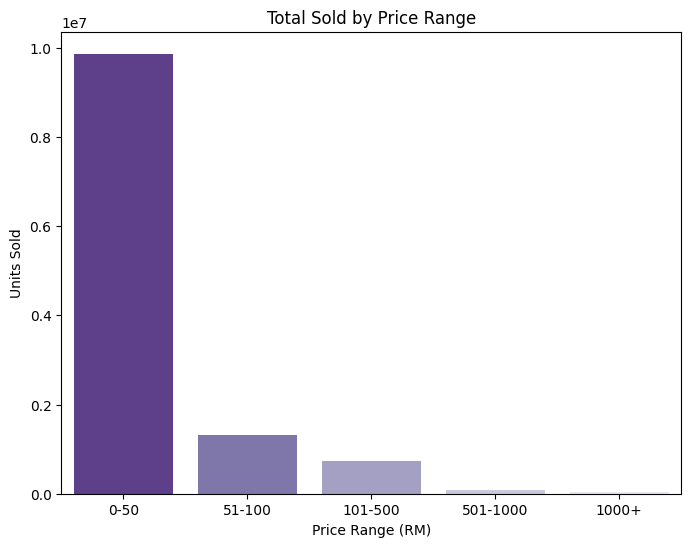


Price Range Sales:
 price_range
0-50        9864450
51-100      1320260
101-500      724413
501-1000      82507
1000+         35561
Name: total_sold, dtype: int64


In [22]:
bins = [0, 50, 100, 500, 1000, df["price_actual"].max()]
labels = ["0-50", "51-100", "101-500", "501-1000", "1000+"]

df["price_range"] = pd.cut(df["price_actual"], bins=bins, labels=labels, include_lowest=True)

price_sales = df.groupby("price_range", observed=False)["total_sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=price_sales.index, y=price_sales.values, hue=price_sales.index, palette="Purples_r", legend=False)
plt.title("Total Sold by Price Range")
plt.xlabel("Price Range (RM)")
plt.ylabel("Units Sold")
plt.show()

print("\nPrice Range Sales:\n", price_sales)


### Price Range Sales Analysis

The sales distribution by price range shows that the majority of units sold are in the **low-price segment**.

| Price Range | Total Units Sold |
|-------------|-----------------|
| **0–50**      | **9,864,450** |
| 51–100        | 1,320,260 |
| 101–500       | 724,413 |
| 501–1000      | 82,507 |
| 1000+         | 35,561 |

This analysis highlights that **affordable products priced below RM50 dominate the market**, accounting for nearly 10 million units sold. Mid-range items (RM51–500) contribute a smaller share, while high-ticket items above RM500 represent only a fraction of total sales.


## 4. Key Insights

- **Affordable products (< RM50)** dominate sales volume, confirming that Shopee is driven by budget-friendly items.  
- **Customer ratings** show weak correlation with sales performance — price and brand appear to be stronger drivers.  
- **Regional concentration** is evident, with Selangor, Kuala Lumpur, and Penang leading domestic sales, while Oversea sellers still contribute significantly.  
- **Price segment analysis** highlights RM0–50 as the most popular range, far ahead of mid-range and premium products.  
- **Sales trends** show monthly fluctuations with noticeable seasonal spikes.  
- **Domestic vs Oversea**: Malaysia contributes the majority of sales, but cross-border sellers also hold a meaningful share.  


## 5. Conclusion

This project demonstrates the full analytics workflow for Shopee e-commerce data:  

- **Data Cleaning**: handled duplicates, missing values, and data type conversions.  
- **Exploratory Data Analysis (EDA)**: applied Pandas, Matplotlib, and Seaborn for descriptive insights.  
- **Business Insights**: uncovered sales drivers by region, price range, and product category, highlighting the dominance of affordable items and key regional markets.  

Overall, the analysis confirms that Shopee’s growth is fueled by **budget-conscious consumers in Malaysia**, with **Selangor and Kuala Lumpur** emerging as the strongest markets and **cross-border sellers** representing a promising secondary opportunity.  
